In [ ]:
import tensorflow as tf
import os
gpus =  tf.config.experimental.list_physical_devices('GPU')
gpus
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Read CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/dataset/jirasoftware.csv')

In [ ]:
df

,issuekey,title,description,storypoint
0,GHS-1271,As a JIRA Administrator I would like to be abl...,NaN,5
1,JSW-1271,As a JIRA Administrator I would like to be abl...,NaN,5
2,GHS-1681,Generic webwork aliases may clash with other p...,Some web work actions have commands that have ...,5
3,JSW-1681,Generic webwork aliases may clash with other p...,Some web work actions have commands that have ...,5
4,GHS-1819,"Add text to the Agile Gadget ""Invalid Project""...","When the error is ""Invalid Project"" add detail...",2
...,...,...,...,...
347,JSW-14368,As a reviewer I want to have an account so tha...,NaN,4
348,JSW-14348,As an Admin I want to be able to assign roles,NaN,4
349,JSW-14353,As an Admin I want to create Writer accounts,NaN,4
350,JSW-14355,As an Admin I want to create Reviewer accounts,NaN,4


In [ ]:
df = df.drop('issuekey', axis=1)
df = df.drop('description', axis=1)

In [ ]:
df

,title,storypoint
0,As a JIRA Administrator I would like to be abl...,5
1,As a JIRA Administrator I would like to be abl...,5
2,Generic webwork aliases may clash with other p...,5
3,Generic webwork aliases may clash with other p...,5
4,"Add text to the Agile Gadget ""Invalid Project""...",2
...,...,...
347,As a reviewer I want to have an account so tha...,4
348,As an Admin I want to be able to assign roles,4
349,As an Admin I want to create Writer accounts,4
350,As an Admin I want to create Reviewer accounts,4


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# Load NLTK's stopword and lemmatizer resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


# Define preprocessing functions
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove stop words
    filtered_words = [word for word in tokens if word not in stop_words]
    # Lemmatize words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    # Join words back to form text
    preprocessed_text = ' '.join(lemmatized_words)
    return preprocessed_text

# Apply the preprocessing function to the 'Column Names' column and store results in 'pp_US' column
df['pp_US'] = df['title'].apply(preprocess_text)

# Display the original and preprocessed column names
print("Original Column Names:")
print(df[['title']])
print("\nColumn Names after Text Preprocessing:")
print(df[['pp_US']])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Original Column Names:
                                                 title
0    As a JIRA Administrator I would like to be abl...
1    As a JIRA Administrator I would like to be abl...
2    Generic webwork aliases may clash with other p...
3    Generic webwork aliases may clash with other p...
4    Add text to the Agile Gadget "Invalid Project"...
..                                                 ...
347  As a reviewer I want to have an account so tha...
348      As an Admin I want to be able to assign roles
349       As an Admin I want to create Writer accounts
350     As an Admin I want to create Reviewer accounts
351  As an Admin I want to create MediaManager acco...

[352 rows x 1 columns]

Column Names after Text Preprocessing:
                                                 pp_US
0    jira administrator would like able change trig...
1    jira administrator would like able change trig...
2              generic webwork alias may clash plugins
3              generic webwork al

In [ ]:
df

,title,storypoint,pp_US
0,As a JIRA Administrator I would like to be abl...,5,jira administrator would like able change trig...
1,As a JIRA Administrator I would like to be abl...,5,jira administrator would like able change trig...
2,Generic webwork aliases may clash with other p...,5,generic webwork alias may clash plugins
3,Generic webwork aliases may clash with other p...,5,generic webwork alias may clash plugins
4,"Add text to the Agile Gadget ""Invalid Project""...",2,add text agile gadget `` invalid project '' me...
...,...,...,...
347,As a reviewer I want to have an account so tha...,4,reviewer want account review article
348,As an Admin I want to be able to assign roles,4,admin want able assign role
349,As an Admin I want to create Writer accounts,4,admin want create writer account
350,As an Admin I want to create Reviewer accounts,4,admin want create reviewer account


In [ ]:
my_list = df['pp_US'].tolist()

# Print the list
print(my_list)

['jira administrator would like able change trigger night service', 'jira administrator would like able change trigger night service', 'generic webwork alias may clash plugins', 'generic webwork alias may clash plugins', "add text agile gadget `` invalid project '' message", "add text agile gadget `` invalid project '' message", 'greenhopper ranking field displayed correctly using confluence jira issue macro', 'greenhopper ranking field displayed correctly using confluence jira issue macro', 'version set create issue screen jira , greenhopper', 'version set create issue screen jira , greenhopper', 'user would like ability see horizontal swimlane rapid board', 'user would like ability see horizontal swimlane rapid board', 'gh user would like able view cumulative flow diagram using story point', 'greenhopper appends project id url adding list enabled project , cause http 413 error .', 'greenhopper appends project id url adding list enabled project , cause http 413 error .', "investigate 

In [ ]:
import timeit

start_time = timeit.default_timer()


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the text data into numeric vectors using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(my_list)

# Set the parameters for the DBSCAN algorithm
eps = 0.5
min_samples = 2

# Implement the DBSCAN algorithm
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)

# Print the resulting clusters
for i, cluster in enumerate(clusters):
    print(f"Document {i}: Cluster {cluster}")

# Assign cluster labels to the rows in the DataFrame
df['cluster_label'] = clusters

Document 0: Cluster 0
Document 1: Cluster 0
Document 2: Cluster 1
Document 3: Cluster 1
Document 4: Cluster 2
Document 5: Cluster 2
Document 6: Cluster 3
Document 7: Cluster 3
Document 8: Cluster 4
Document 9: Cluster 4
Document 10: Cluster 5
Document 11: Cluster 5
Document 12: Cluster -1
Document 13: Cluster 6
Document 14: Cluster 6
Document 15: Cluster 7
Document 16: Cluster 7
Document 17: Cluster 8
Document 18: Cluster 8
Document 19: Cluster 9
Document 20: Cluster 9
Document 21: Cluster 10
Document 22: Cluster 10
Document 23: Cluster 11
Document 24: Cluster 11
Document 25: Cluster 12
Document 26: Cluster 12
Document 27: Cluster 13
Document 28: Cluster 13
Document 29: Cluster 14
Document 30: Cluster 14
Document 31: Cluster 15
Document 32: Cluster 15
Document 33: Cluster 16
Document 34: Cluster 16
Document 35: Cluster 17
Document 36: Cluster 17
Document 37: Cluster 18
Document 38: Cluster 18
Document 39: Cluster 19
Document 40: Cluster 19
Document 41: Cluster 20
Document 42: Cluster 2

In [ ]:
elapsed_time = timeit.default_timer() - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")


Elapsed time: 0.37 seconds


In [ ]:
time=[0.34, 1.89, 1.03, 0.19, 0.96, ]

In [ ]:
# Import the necessary modules
from memory_profiler import profile, memory_usage
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Define the function to profile
@profile
def my_function():
    # Convert the text data into numeric vectors using TF-IDF
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(my_list)

    # Set the parameters for the DBSCAN algorithm
    eps = 0.5
    min_samples = 2

    # Implement the DBSCAN algorithm
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)

    # Print the resulting clusters
    for i, cluster in enumerate(clusters):
        print(f"Document {i}: Cluster {cluster}")

    # Assign cluster labels to the rows in the DataFrame
    df['cluster_label'] = clusters

# Call the function to profile
mem_usage = memory_usage(proc=my_function)

# Generate the memory usage graph
timestamps = [i for i in range(len(mem_usage))]
memory_usage = mem_usage
plt.plot(timestamps, memory_usage)
plt.xlabel('Time (s)')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Graph')
plt.show()


ModuleNotFoundError: ignored

Document 0: Cluster 0
Document 1: Cluster 0
Document 2: Cluster 1
Document 3: Cluster 1
Document 4: Cluster 2
Document 5: Cluster 2
Document 6: Cluster 3
Document 7: Cluster 3
Document 8: Cluster 4
Document 9: Cluster 4
Document 10: Cluster 5
Document 11: Cluster 5
Document 12: Cluster -1
Document 13: Cluster 6
Document 14: Cluster 6
Document 15: Cluster 7
Document 16: Cluster 7
Document 17: Cluster 8
Document 18: Cluster 8
Document 19: Cluster 9
Document 20: Cluster 9
Document 21: Cluster 10
Document 22: Cluster 10
Document 23: Cluster 11
Document 24: Cluster 11
Document 25: Cluster 12
Document 26: Cluster 12
Document 27: Cluster 13
Document 28: Cluster 13
Document 29: Cluster 14
Document 30: Cluster 14
Document 31: Cluster 15
Document 32: Cluster 15
Document 33: Cluster 16
Document 34: Cluster 16
Document 35: Cluster 17
Document 36: Cluster 17
Document 37: Cluster 18
Document 38: Cluster 18
Document 39: Cluster 19
Document 40: Cluster 19
Document 41: Cluster 20
Document 42: Cluster 2

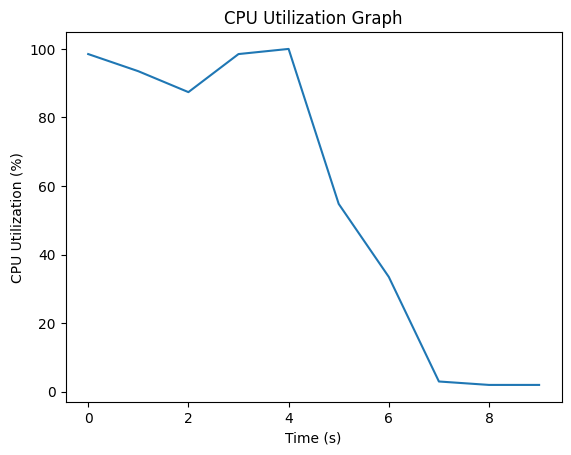

In [ ]:
import psutil
import time
import matplotlib.pyplot as plt

# Define the function to profile
def my_function():
    # Convert the text data into numeric vectors using TF-IDF
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(my_list)

    # Set the parameters for the DBSCAN algorithm
    eps = 0.5
    min_samples = 2

    # Implement the DBSCAN algorithm
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)

    # Print the resulting clusters
    for i, cluster in enumerate(clusters):
        print(f"Document {i}: Cluster {cluster}")

    # Assign cluster labels to the rows in the DataFrame
    df['cluster_label'] = clusters


# Call the function to profile and collect CPU usage data
cpu_usage = []
start_time = time.time()
for i in range(10):
    cpu_percent = psutil.cpu_percent(interval=1)
    cpu_usage.append(cpu_percent)
my_function()
end_time = time.time()

# Generate the CPU utilization graph
timestamps = [i for i in range(len(cpu_usage))]
cpu_utilization = cpu_usage
plt.plot(timestamps, cpu_utilization)
plt.xlabel('Time (s)')
plt.ylabel('CPU Utilization (%)')
plt.title('CPU Utilization Graph')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for the clustering results
silhouette_avg = silhouette_score(X, clusters)

# Print the Silhouette Score
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.31982729984396524


In [ ]:
from sklearn.metrics import calinski_harabasz_score

# Calculate the Calinski-Harabasz Index for the clustering results
calinski_harabasz = calinski_harabasz_score(X.toarray(), clusters)

# Print the Calinski-Harabasz Index
print(f"Calinski-Harabasz Index: {calinski_harabasz}")


Calinski-Harabasz Index: 2.633976654954961


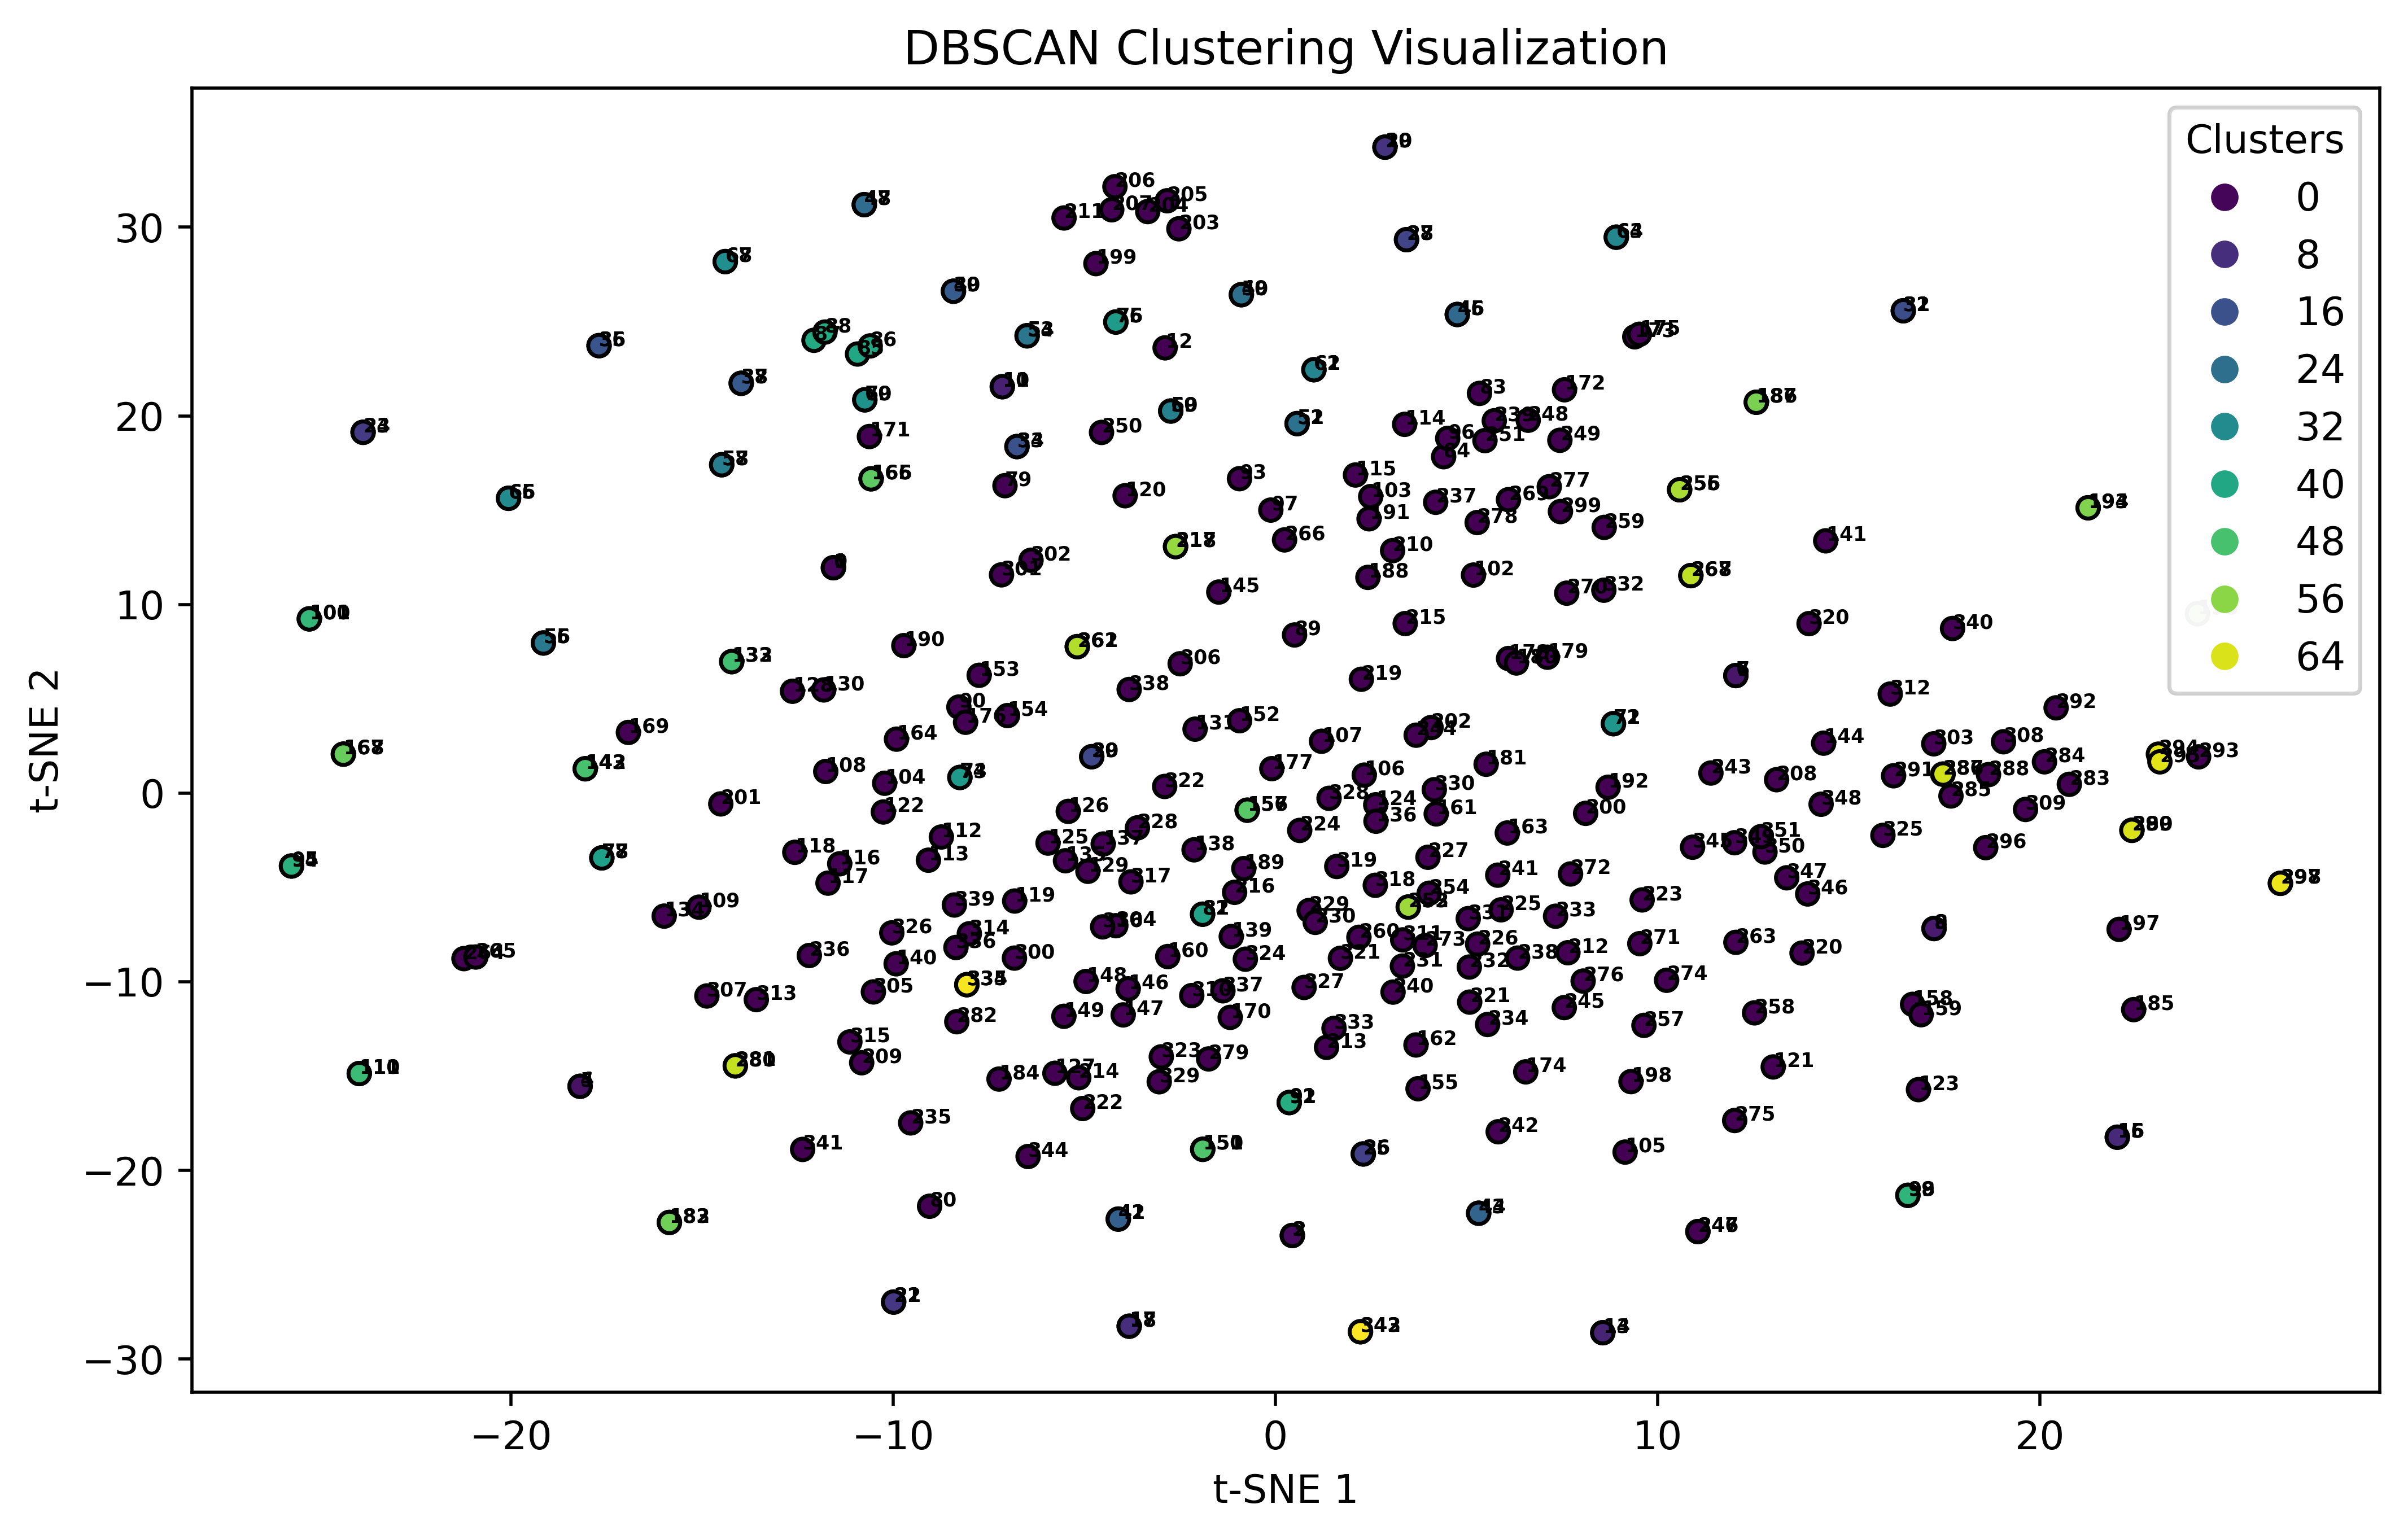

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Perform dimensionality reduction using t-SNE with random initialization
tsne = TSNE(n_components=2, random_state=42, init='random')
X_2d = tsne.fit_transform(X)

# Plot the clustering results
plt.figure(figsize=(10, 6), dpi=500)  # Set DPI to 500
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='viridis', marker='o', s=30, edgecolor='k')  # Change s to 50 for smaller points

# Add legend using unique cluster labels
legend1 = plt.legend(*scatter.legend_elements(), loc="best", title="Clusters")
plt.gca().add_artist(legend1)

# Add labels to the points
for i, (x, y) in enumerate(X_2d):
    plt.text(x, y, f"{i}", fontsize=5, fontweight="bold")

plt.title("DBSCAN Clustering Visualization")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")

plt.savefig('clustering_plot.png', dpi=500)  # Save the plot with DPI of 500

plt.show()


In [ ]:
df

,title,storypoint,pp_US,cluster_label
0,As a JIRA Administrator I would like to be abl...,5,jira administrator would like able change trig...,0
1,As a JIRA Administrator I would like to be abl...,5,jira administrator would like able change trig...,0
2,Generic webwork aliases may clash with other p...,5,generic webwork alias may clash plugins,1
3,Generic webwork aliases may clash with other p...,5,generic webwork alias may clash plugins,1
4,"Add text to the Agile Gadget ""Invalid Project""...",2,add text agile gadget `` invalid project '' me...,2
...,...,...,...,...
347,As a reviewer I want to have an account so tha...,4,reviewer want account review article,-1
348,As an Admin I want to be able to assign roles,4,admin want able assign role,-1
349,As an Admin I want to create Writer accounts,4,admin want create writer account,-1
350,As an Admin I want to create Reviewer accounts,4,admin want create reviewer account,-1


In [ ]:
import timeit

start_time = timeit.default_timer()

In [ ]:
#CELL FOR KMEANS CLUSTERING FOR SIMILAR DATA

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

# Extract features from the text data using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['pp_US'])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=10)  # specify the number of clusters you want
kmeans.fit(X)

# Assign cluster labels to the rows in the DataFrame
df['cluster_label'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
elapsed_time = timeit.default_timer() - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")


Elapsed time: 6.46 seconds


In [ ]:
# Import the necessary modules
from memory_profiler import profile, memory_usage
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the function to profile
@profile
def kmeans_clustering():
    # Extract features from the text data using CountVectorizer
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df['pp_US'])

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=10)  # specify the number of clusters you want
    kmeans.fit(X)

    # Assign cluster labels to the rows in the DataFrame
    df['cluster_label'] = kmeans.labels_

# Call the function to profile
mem_usage = memory_usage(proc=kmeans_clustering)

# Generate the memory usage graph
timestamps = [i for i in range(len(mem_usage))]
memory_usage = mem_usage
plt.plot(timestamps, memory_usage)
plt.xlabel('Time (s)')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Graph')
plt.show()


ModuleNotFoundError: ignored

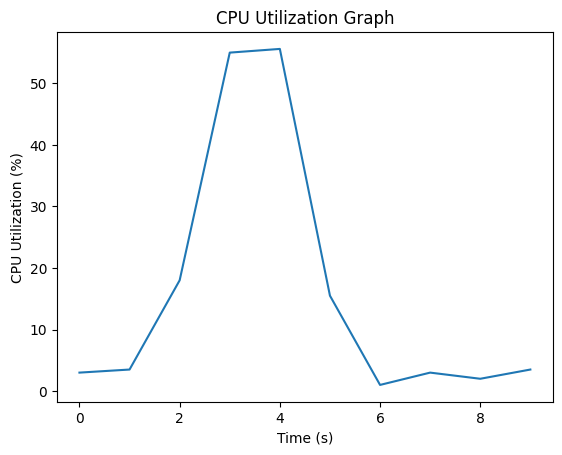

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import psutil

# Extract features from the text data using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['pp_US'])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

# Assign cluster labels to the rows in the DataFrame
df['cluster_label'] = kmeans.labels_

# Create lists to store CPU usage and timestamps
cpu_usage = []
timestamps = []

# Measure CPU utilization every second for 10 seconds
for i in range(10):
    cpu_percent = psutil.cpu_percent(interval=1)
    cpu_usage.append(cpu_percent)
    timestamps.append(i)

# Generate the CPU utilization graph
plt.plot(timestamps, cpu_usage)
plt.xlabel('Time (s)')
plt.ylabel('CPU Utilization (%)')
plt.title('CPU Utilization Graph')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for the clustering results
silhouette_avg = silhouette_score(X, clusters)

# Print the Silhouette Score
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.24994723046881784


In [ ]:
from sklearn.metrics import calinski_harabasz_score

# Calculate the Calinski-Harabasz Index for the clustering results
calinski_harabasz = calinski_harabasz_score(X.toarray(), clusters)

# Print the Calinski-Harabasz Index
print(f"Calinski-Harabasz Index: {calinski_harabasz}")


Calinski-Harabasz Index: 2.8826931914284644


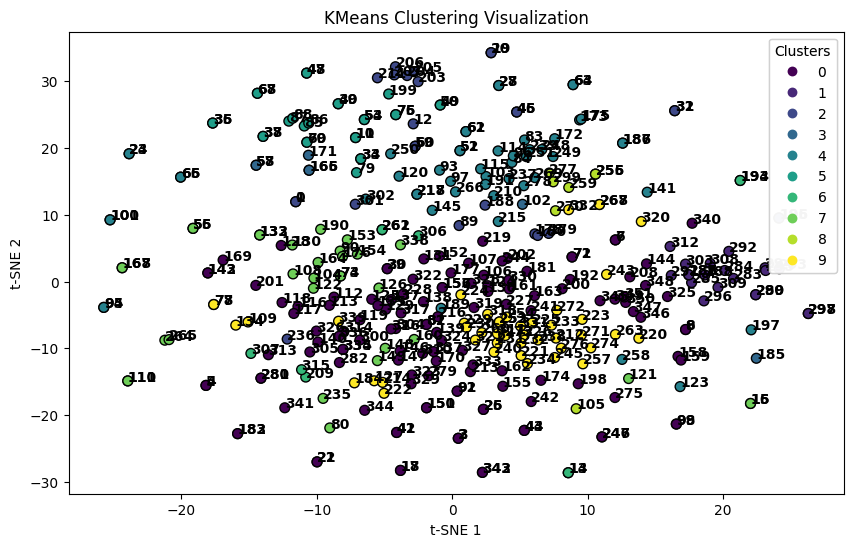

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Perform dimensionality reduction using t-SNE with random initialization
tsne = TSNE(n_components=2, random_state=42, init='random')
X_2d = tsne.fit_transform(X.toarray())  # Convert sparse matrix to dense array

# Plot the clustering results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=df['cluster_label'], cmap='viridis', marker='o', s=50, edgecolor='k')

# Add legend using unique cluster labels
legend1 = plt.legend(*scatter.legend_elements(), loc="best", title="Clusters")
plt.gca().add_artist(legend1)

# Add labels to the points
for i, (x, y) in enumerate(X_2d):
    plt.text(x, y, f"{i}", fontsize=10, fontweight="bold")

plt.title("KMeans Clustering Visualization")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()


In [ ]:
num_sprints = 24
sum_SP = df['storypoint'].sum()
sum_SP

#for each sprint
avg_totSP_sprint = sum_SP/num_sprints
avg_totSP_sprint

65.0

In [ ]:
import timeit

start_time = timeit.default_timer()


In [ ]:
#WORKING CODE

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Read data from dataframe
user_stories = df['storypoint'].values
cluster_labels = df['cluster_label'].values

# Total number of sprints
num_sprints = 24

# Define the target total story points for each sprint
target_sp_per_sprint = 65

# Get unique cluster labels and number of clusters
cluster_labels_unique = np.unique(cluster_labels)
num_clusters = len(cluster_labels_unique)

# Initialize the story allocation to sprints
story_allocation = np.zeros(len(user_stories), dtype=int)

# Perform clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(user_stories.reshape(-1, 1))
cluster_centers = kmeans.cluster_centers_
cluster_labels_pred = kmeans.labels_

# Sort the clusters based on their center values
sorted_clusters = np.argsort(cluster_centers.reshape(-1))

# Assign user stories to sprints
for cluster in sorted_clusters:
    stories_in_cluster = np.where(cluster_labels_pred == cluster_labels_unique[cluster])[0]
    np.random.shuffle(stories_in_cluster)  # Shuffle the stories in the cluster for randomness
    num_stories_per_sprint = len(stories_in_cluster) // num_sprints  # Number of stories per sprint
    for i in range(num_sprints):
        sprint_stories = stories_in_cluster[i*num_stories_per_sprint:(i+1)*num_stories_per_sprint]
        story_allocation[sprint_stories] = i+1  # Assign the sprint number to the stories

# Check if there are remaining stories to be assigned
remaining_stories = np.where(story_allocation == 0)[0]
if len(remaining_stories) > 0:
    np.random.shuffle(remaining_stories)  # Shuffle the remaining stories for randomness
    num_stories_per_sprint = len(remaining_stories) // num_sprints  # Number of stories per sprint
    for i in range(num_sprints):
        sprint_stories = remaining_stories[i*num_stories_per_sprint:(i+1)*num_stories_per_sprint]
        story_allocation[sprint_stories] = i+1  # Assign the sprint number to the stories

# Calculate the total story points in each sprint
sprint_story_points = np.zeros(num_sprints)
for i in range(num_sprints):
    sprint_story_points[i] = np.sum(user_stories[story_allocation == i+1])

# Print the story allocation to sprints
print("Story allocation to sprints:", story_allocation)
print("Total story points in each sprint:", sprint_story_points)

Story allocation to sprints: [ 8 12 17  2  1 18 16 17 21 18  0  4 13 12 10 10  8  3 14 11 21 23  7 13
 16 16 22  8 17  9 10  7 12 23  5  8  5 17  4  4  0 24  1 13 18 23  0 13
 16  6 18  7  1  3  6  0 22  6 19  8  9 22 20 11  1 10 23 17  5 22  0 14
  3 24  6  4 14 11 15 11 19 16 15  3 17  2 15 14  6  9 12  1 13  5  6  3
 14 20  4 22  9 16  1  5  0  7 10 10  5 11  7 20  0  4 16 23 11 19 19 20
  8 11 21 21 20  2 18  5  2 21  3 18  0 12 12  4 22  0  9 11  1  1 15 14
 17  7 21 13  7 11 19 18 17 12  9  8 10 11  4 23 21 23  7  3 23  7  7 21
 20  3  8 18  9 21  8 11  6 12  9 15 24  0  6 15 18  2 22 15  8 13 13 15
 23 24 22 23 14  2 16  6 12  8  4  5  6 15  5 21  3 11 24  4  5 16 14  1
 17 23 19 16  7 22 20 21  0  5 20  6  2 24 10 14  4 14 10 13 21 13 10  7
  2 12 19  2 10  8  2 24 17  4 22  0 20 24 17  3 17 19  9 20 14 10  9 11
 16  9 18  0 13 14  3 13 21  5  2 22 24 18  1  2  0 22  8  3  1 20  3  7
 22  1 24 15  8  0 14 24 15 12 13 19  3 12 19 19 13  9 23 10 16 15 23 19
 20 12  6 16 11  4 14 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-34-494d3abea843>:25: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(user_stories.reshape(-1, 1))


In [ ]:
elapsed_time = timeit.default_timer() - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")


Elapsed time: 26.61 seconds


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate the silhouette score
silhouette = silhouette_score(user_stories.reshape(-1, 1), cluster_labels_pred)
print(f"Silhouette score: {silhouette:.2f}")

# Calculate the Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(user_stories.reshape(-1, 1), cluster_labels_pred)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")


Silhouette score: 1.00
Calinski-Harabasz Index: 1.00


In [ ]:
import timeit

start_time = timeit.default_timer()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN

# Read data from dataframe
user_stories = df['storypoint'].values
cluster_labels = df['cluster_label'].values

# Total number of sprints
num_sprints = 24

# Define the target total story points for each sprint
target_sp_per_sprint = 65

# Set the parameters for the DBSCAN algorithm
eps = 5
min_samples = 2

# Perform clustering with DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(user_stories.reshape(-1, 1))
cluster_labels_pred = dbscan.labels_

# Get unique cluster labels and number of clusters
cluster_labels_unique = np.unique(cluster_labels_pred)
num_clusters = len(cluster_labels_unique)

# Initialize the story allocation to sprints
story_allocation = np.zeros(len(user_stories), dtype=int)

# Assign user stories to sprints
for cluster in cluster_labels_unique:
    if cluster == -1:  # Ignore the noise cluster (label -1)
        continue
    stories_in_cluster = np.where(cluster_labels_pred == cluster)[0]
    np.random.shuffle(stories_in_cluster)  # Shuffle the stories in the cluster for randomness
    num_stories_per_sprint = len(stories_in_cluster) // num_sprints  # Number of stories per sprint
    for i in range(num_sprints):
        sprint_stories = stories_in_cluster[i*num_stories_per_sprint:(i+1)*num_stories_per_sprint]
        story_allocation[sprint_stories] = i+1  # Assign the sprint number to the stories

# Calculate the total story points in each sprint
sprint_story_points = np.zeros(num_sprints)
for i in range(num_sprints):
    sprint_story_points[i] = np.sum(user_stories[story_allocation == i+1])

# Print the story allocation to sprints
print("Story allocation to sprints:", story_allocation)
print("Total story points in each sprint:", sprint_story_points)


Story allocation to sprints: [22 14 10 12 19 20  0  0  4 22  3 16 15 17 13  2  9 24  9  2  2 15  0 11
 17 21 20  7  6 22 21 19 19 16 23 16 24  9 15 14  3 17 13  2  4 12 14 23
  6  1  7 10  2  9 15  2 23 21 13 17  6 17  3 24 21 24 16 13  8  7  5  0
 24  3 18 15 19  2  4  6  1 12  1  5  5 11 21  9  7 24  6  8  7 10  4 16
  6 21 14  3  1 19  2 23 17  3 11 23 11 15 13 14  0 24  4  4 10 14  0  0
  1 22 21 19 23  4  0 15 21  2  1  5  5  8 19 21 18  2  0 18 11 24 18  5
  4 21 18  5 12 22 18 13  4 14  7 17  3 10 13  2 18 10 20 15 17 10  4  6
  0 19 24 14  0 17 13 24 12 21  5 11  5 22 15  4  7 11  6 10 23  7 22  5
 17  3 20  0  8 16 18 19  7 13 20 20 10 10 10 13 24  0 15  8 24  9  9 14
 15 22 10  9  4  0  2 11 20 17 14 20 13 15 16 16  2  9 10  9  8 20 23 14
 19 18 12 14 22 11 11  7 16 17  3 12 16 21  4  3  6  1  5 16  6 20  6 23
 19  3 11 22 23  9 23  3 18  8  8  7 15 11 12 12 16 14 13 13 15 20 17  1
 23 20  5  3  6 19 11  3 24 10 12 21  6 12  7 23  0 21 16  5  9  1  7 14
  2 18  4 24 18 18  8 

In [ ]:
elapsed_time = timeit.default_timer() - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")


Elapsed time: 0.04 seconds


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Exclude noise points (label -1) from the evaluation
mask = cluster_labels_pred != -1
user_stories_no_noise = user_stories[mask].reshape(-1, 1)
cluster_labels_pred_no_noise = cluster_labels_pred[mask]

# Calculate the silhouette score
silhouette = silhouette_score(user_stories_no_noise, cluster_labels_pred_no_noise)
print(f"Silhouette score: {silhouette:.2f}")

# Calculate the Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(user_stories_no_noise, cluster_labels_pred_no_noise)
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")


Silhouette score: 0.78
Calinski-Harabasz Index: 181.37


In [ ]:
for i in range(num_sprints):
    sprint_story_points[i] = np.sum(user_stories[story_allocation == i+1])
    print("Sprint number: {}".format(i+1))
    print(user_stories[story_allocation == i+1])

Sprint number: 1
[ 5  2  2  5  1 13  3  3  5  3  3  2  8  2]
Sprint number: 2
[2 8 8 2 8 1 1 2 8 8 2 2 5 2]
Sprint number: 3
[13  5  3  3  2  8 13  5  1  2  5  5  3  3]
Sprint number: 4
[5 2 1 8 2 2 5 5 3 5 3 1 8 5]
Sprint number: 5
[1 2 8 5 8 8 5 3 5 2 3 5 3 5]
Sprint number: 6
[8 5 3 2 2 2 5 8 2 1 5 2 5 4]
Sprint number: 7
[8 5 1 1 3 8 1 3 5 2 2 1 3 2]
Sprint number: 8
[2 3 8 5 8 3 3 3 2 3 1 8 2 1]
Sprint number: 9
[2 5 5 5 1 5 3 3 1 8 5 5 2 2]
Sprint number: 10
[ 5  8  8  8 13  3  5  8  3  2  3  5  2 13]
Sprint number: 11
[ 5  1  8 13  1  5  8  2  3  2  2  1  3  1]
Sprint number: 12
[ 5  8  2  5  2  8  1  8  2 13  1  3  4  3]
Sprint number: 13
[ 3  5  8  2 13  8  2  3  1  5  3  5  5  3]
Sprint number: 14
[ 5  5  8  2 13  5  5  1  2  1  1  5  1  3]
Sprint number: 15
[13  2  5  5  5  5  8  2  3  3  1  2  1  5]
Sprint number: 16
[13  5  5  1  8  3  3  2  3  5  2  1  5  2]
Sprint number: 17
[3 5 5 3 3 8 2 8 3 1 2 3 3 1]
Sprint number: 18
[3 3 3 8 8 8 2 1 1 3 3 8 2 2]
Sprint number: 19
[

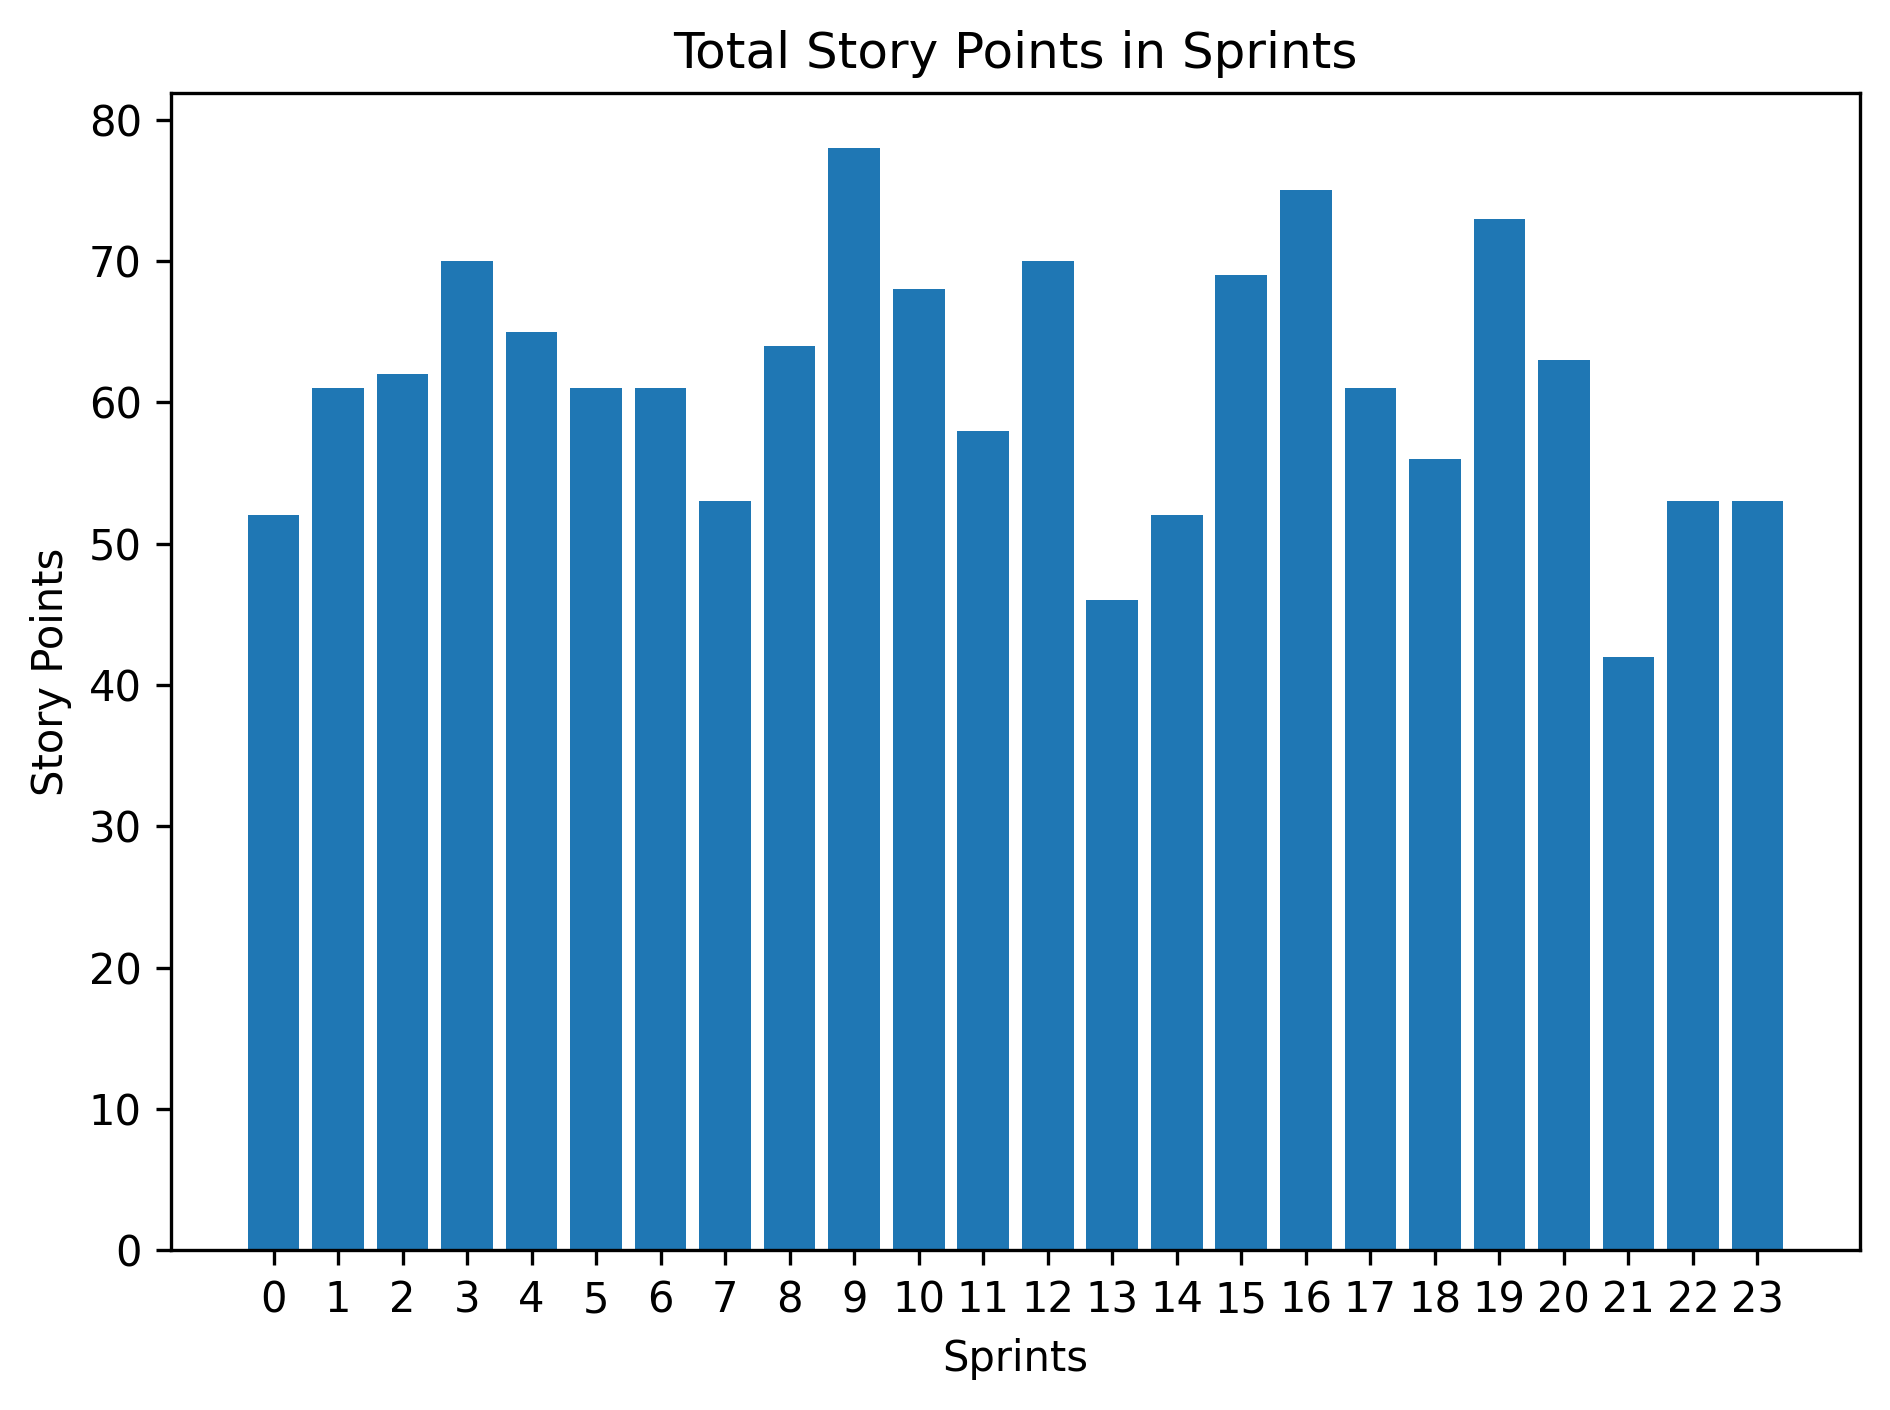

In [ ]:
import matplotlib.pyplot as plt

# Data representing story points
data = [52, 61, 62, 70, 65, 61, 61, 53, 64, 78, 68, 58, 70, 46, 52, 69, 75, 61, 56, 73, 63, 42, 53, 53]

# Create a figure and set the DPI (pixel density)
fig = plt.figure(dpi=300)

# Create the bar plot
plt.bar(range(len(data)), data)

# Customize the plot
plt.xlabel('Sprints')
plt.ylabel('Story Points')
plt.title('Total Story Points in Sprints')
plt.xticks(range(len(data)))  # Set x-axis tick labels
plt.tight_layout()  # Adjust spacing

# Save the plot with high pixel density
plt.savefig('bar_graph.png', dpi=500)

# Show the plot
plt.show()
